# Going (Abroad) for Gold? 

The olympics would not be complete without nationalist pomp and circumstance. The symbolic summons for states to send their strongest, fastest, and most graceful representatives to compete on the world stage even begins with a show of host-country pride. Even Olympic uniforms are designed to the sequin by representatives of each team's country, so that olympians are dressed as true patriots. 

But despite the chest-beating, torch-bearing commitment to countries that Olympic ceremonies imply, not all athletes are competing under their own national flag. In this analysis, I investigate which countries "import" their athletes, exploring which countries' athletes are most likely to compete with another team, and which countries are most likely to "export" athletes, or send their representatives abroad. Finally, I explore whether athletes competing under another flag are more likely to be successful.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
athletes = pd.read_csv('data/bios_locs.csv')
    #just keep athlete ID, name, born_country, lat and long
athletes2 = athletes[['athlete_id', 'born_country', 'lat', 'long']]
wodat = pd.read_csv('data/winter_olympics_medals.csv')
    #medals from winter olympics for the whole things
wodat.shape
#merge the two datasets: 
wodat = pd.merge(wodat, athletes2, on='athlete_id')
wodat.shape
wodat.sample(5)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,born_country,lat,long
63926,2022.0,Winter,Alpine Skiing (Skiing),"Giant Slalom, Men (Olympic)",Yassine Aouich,148648,MAR,NaN,NaN,False,NaN,MAR,NaN,NaN
44890,2018.0,Winter,Biathlon,"2 × 6 kilometres and 2 × 7.5 kilometres Relay,...",Anastasia Kuzmina,118501,SVK,Slovakia,NaN,False,NaN,RUS,NaN,NaN
61125,2020.0,Winter,Ice Hockey (Ice Hockey),"Ice Hockey, Boys (YOG)",Lian Bichsel,139661,SUI,Switzerland,5.0,False,NaN,SUI,NaN,NaN
12399,1992.0,Winter,Figure Skating (Skating),"Ice Dancing, Mixed (Olympic)",Paul Duchesnay,85315,FRA,Isabelle Duchesnay,2.0,False,Silver,FRA,NaN,NaN
16492,1968.0,Winter,Speed Skating (Skating),"500 metres, Men (Olympic)",Herbert Höfl,87287,FRG,NaN,11.0,True,NaN,GER,NaN,NaN


In [4]:
#summary stats
wodat.shape

(64509, 14)

First, I merged datasets that contained information about each winter olympic athlete and competition since 1922 and olympian bios, which contained each olympian's coumntry of birth. 

In [5]:
#making a version of the dataset with only imported/exported athletes
datfilt = wodat['noc'] != wodat['born_country']
impdat = wodat.loc[datfilt]
impdat.shape

#64509-17502 = 47007 
#dropping about 47,000 rows which seems about right. most olympians compete for their home countries. 

(17502, 14)

In [6]:
#get rid of NA values
datfilt2 = impdat['born_country'].notna()
impdat = impdat.loc[datfilt2]
impdat.sample(5)
#another 10,000 rows didn't have good location data for where athletes were born
#wodat['year'].max()
#wodat['year'].min() #still seem to have good coverage for years though which is good. 

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,born_country,lat,long
20418,1980.0,Winter,Speed Skating (Skating),"5,000 metres, Men (Olympic)",Viktor Lyoskin,91991,URS,NaN,11.0,False,NaN,RUS,NaN,NaN
2737,1992.0,Winter,Speed Skating (Skating),"1,000 metres, Women (Olympic)",Emese Hunyady,81329,AUT,NaN,10.0,False,NaN,HUN,NaN,NaN
11982,1976.0,Winter,Cross Country Skiing (Skiing),"50 kilometres, Men (Olympic)",Walter Demel,85148,FRG,NaN,25.0,False,NaN,GER,NaN,NaN
24357,1984.0,Winter,Nordic Combined (Skiing),"Individual, Men (Olympic)",Aleksandr Prosvirnin,96609,URS,NaN,6.0,False,NaN,UKR,NaN,NaN
9060,1980.0,Winter,Cross Country Skiing (Skiing),"4 × 10 kilometres Relay, Men (Olympic)",Jochen Behle,83962,FRG,West Germany,4.0,False,NaN,GER,NaN,NaN


In [7]:
impdat.shape

(7662, 14)

In [8]:
#filter to unique athlete values
impdat = impdat.drop_duplicates(subset=['as'])
impdat.shape

(3286, 14)

I then created a subset of this data which only included individual values for athletes whose birth country and the 'national olympic committee' that they competed under did not match. This filter repeated rows if an athlete competed for different countries (that were not thier home country) in different years or events, capturing all isntances of movement. 

In [9]:
numimports = impdat.groupby(['noc']).size().to_frame('countrycount').reset_index()
#counting NOC gives the main countries who import athletes
numimports.sort_values('countrycount', ascending = False).head()


,noc,countrycount
93,TCH,440
102,URS,412
35,FRG,311
82,ROC,261
106,YUG,216


Next, I counted how many times a national olympic committe occurred, capturing how often countries were "importers." 

In [10]:
#investigate what country these athletes are really from 
impdat.loc[impdat['noc'] == 'YUG'].sample(5)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,born_country,lat,long
27792,1924.0,Winter,Cross Country Skiing (Skiing),"18 kilometres, Men (Olympic)",Zdenko Švigelj,98023,YUG,NaN,32.0,False,NaN,SLO,NaN,NaN
29434,1984.0,Winter,Ice Hockey (Ice Hockey),"Ice Hockey, Men (Olympic)",Andrej Vidmar,98639,YUG,Yugoslavia,11.0,True,NaN,SLO,NaN,NaN
7142,1956.0,Winter,Cross Country Skiing (Skiing),"10 kilometres, Women (Olympic)",Biserka Vodenlič,82948,YUG,NaN,36.0,False,NaN,CRO,NaN,NaN
9279,1988.0,Winter,Alpine Skiing (Skiing),"Super G, Men (Olympic)",Klemen Bergant,84028,YUG,NaN,16.0,False,NaN,SLO,NaN,NaN
14547,1956.0,Winter,Ski Jumping (Skiing),"Large Hill, Individual, Men (Olympic)",Janez Gorišek,86147,YUG,NaN,50.0,False,NaN,SLO,NaN,NaN


The countries that are the largest importers are Czechoslovakia (TCH), The Union of Soviet Socialist Republics (URS), The German Federation (FRG), The Russian Olympic Committee (ROC), and Yugoslavia (YUG). This makes sense, given that these committes are all results of governments with some kinds of political complexity. Some were were later renamed or dissolved (e.g. the German Federation, or the Russian Olympic Committe). Therefore even if an athlete is Russian, they may be listed as "imported." Some countries were later partitioned, such as Chechoslovakia, whose athletes are identified as either Czech or Slovak for the most part, and Yugoslavia, whose athletes are from the constituent nations which made up the former Yugoslavia. Finally, the Russian Olympic Committee doesn't technically represent Russia, since they were banned from the Olympic games in 2023. 

In [11]:
world_gdf = gpd.read_file('data/worldmap.json')

combined_gdf = pd.merge(world_gdf, 
         numimports,
         left_on='sov_a3',
         right_on='noc',
         how='outer')

combined_gdf['countrycount']= combined_gdf['countrycount'].fillna(0)

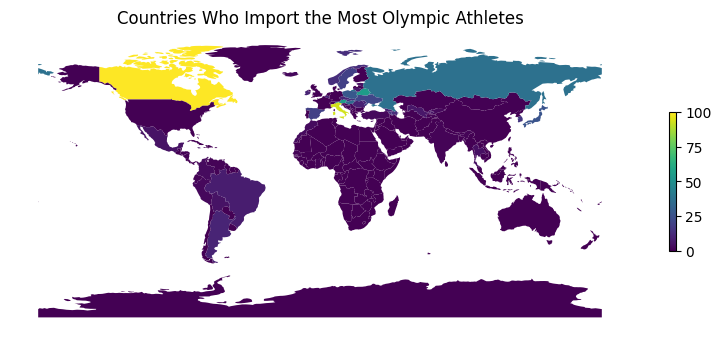

In [12]:
combined_gdf.plot(column='countrycount', 
                  legend=True,
                  legend_kwds={
                      'shrink': 0.3,
                      
                   },
                   figsize=(10, 6),
                vmin=0,
                vmax=100,
                   cmap='viridis'
)

plt.axis('off')
plt.title('Countries Who Import the Most Olympic Athletes')
plt.show()

The map demonstrates countries who "import" the most olympic athletes in yellow, with purple or darkered colored countries "importing the least." Countries in the global south (except for Brazil and Argentina) seem to have less athletes compete under their national banners from abroad, while Europe, Canada, and Russia all host greater numbers of foreign athletes. This might reassure us that athletes from countries who traditionally have better resources and infrastructure for winter sports travel to other countries to avoid competition with conationals. It also might imply that countries on the equator (largely non-importers) are not compensating for a lack of snow by importing winter athletes from other places. 


*Unfortunately I'm almost positive that this is wrong because the US isn't colored grey, and it has at least 200 athletes that aren't from the US competing for them, additionally, this implies that Canada is the biggest importer, which I'm positive is wrong.*

In [27]:
numexports = impdat.groupby(['born_country']).size().to_frame('countrycount').reset_index()

Next, I explored the countries who are most likely to have an athlete compete under another country's flag. 

In [28]:
#same analysis for sending countries
numexports = impdat.groupby(['born_country']).size().to_frame('countrycount').reset_index()

combined_gdf2 = pd.merge(world_gdf, 
         numexports,
         left_on='sov_a3',
         right_on='born_country',
         how='outer')

combined_gdf2['countrycount']= combined_gdf2['countrycount'].fillna(0)


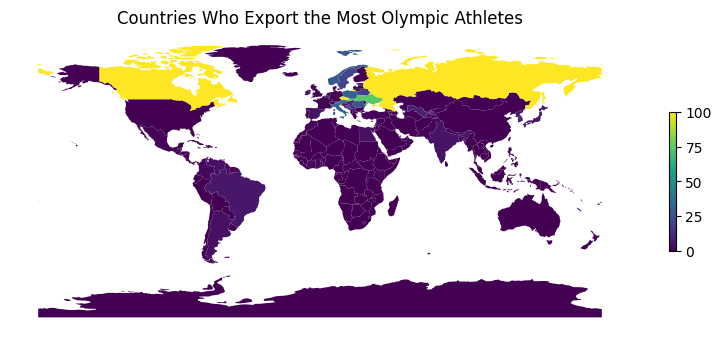

In [29]:
combined_gdf2.plot(column='countrycount', 
                  legend=True,
                  legend_kwds={
                      'shrink': 0.3,
                      
                   },
                   figsize=(10, 6),
                vmin=0,
                vmax=100,
                   cmap='viridis'
)

plt.axis('off')
plt.title('Countries Who Export the Most Olympic Athletes')
plt.show()

The map demonstrates that there is significant overlap between sending and receiving countries for olympians. Europe, Canada, and Russia, once more, stand out as sending countries for athletes. 

In [30]:
numexports.sort_values('countrycount', ascending = False).head()

,born_country,countrycount
73,RUS,845
33,GER,551
23,CZE,433
16,CAN,232
76,SLO,179


As the last analysis demonstrated, places like Russia, Czechoslovakia, and Slovenia, with significant ethnic minorities (or olympic bans) send, or "export," the most olympic athletes, either to their own or other country's olympic committees. Canada stands out among these other countries as having fewer athletes that compete at home. To understand why, I looked at where Canadian athletes compete most often. 

In [31]:
impdat.loc[impdat['born_country'] == 'CAN'].groupby('noc').size().to_frame('sends_to').reset_index().sort_values('sends_to', ascending = False).head(10)

,noc,sends_to
16,ITA,48
29,USA,30
12,GBR,20
2,AUT,18
10,FRA,18
5,CHN,18
13,GER,15
21,NED,10
17,JPN,9
25,SUI,9


Canada sends most of its athletes to other high income, western countries like as Italy, the United States, Great Britain, Austrlia, and France. In this case, it seems like prospective Canadian olympians may not have had the opportunity to compete for their home teams, perhaps because they face too much domestic competition from other highly skilled winter athletes, and therefore travel to other places where they have the opportunity to compete. 

## Do Import/Exported athletes win more often than local athletes? 

In [33]:
#original dataset unflitered for import/export athletes: wodat
wodat['is_import'] = wodat['noc'] != wodat['born_country']
    #making a column for whether someone competes for the country that they came from
#wodat.head()

medal_counts = wodat.groupby(['is_import', 'medal']).size() 
medal_counts
#make a column that's t/f for if they're a import/export country or not, then count the medals for each kind of country

is_import  medal 
False      Bronze    1876
           Gold      1761
           Silver    1856
True       Bronze     658
           Gold       798
           Silver     706
dtype: int64

Generally, it looks like import countries generally do worse in the olympic medal counts...

In [19]:
total_athletes = wodat.groupby('is_import').size()
total_athletes

is_import
False    47007
True     17502
dtype: int64

However, they also send less athletes to the olympics than non import/export countries. So it's very possible that they're actually outperforming these countries in a way that raw medal counts don't factor in. To better understand this problem, we can solve for the proportions of medals given the number of total sending athletes. 

In [20]:
medal_proportions = medal_counts / total_athletes
medal_proportions.round(4)*100

is_import  medal 
False      Bronze    3.99
           Gold      3.75
           Silver    3.95
True       Bronze    3.76
           Gold      4.56
           Silver    4.03
dtype: float64

The table tells us that, in fact, import/export athletes outcompete athletes who represent their own countries in relative terms. For example, only 3.75% of native-country athletes won a Gold metal in the time period analyzed, while 4.56 import/export athletes won Gold. In fact, the only medal category in which native-country athletes do better is in the Bronze category. 

This relative high performance could be due to a many factors. The results of the earlier data analysis show that Russia, traditionally one of the most competitive countries in the winter olympics, is also the highest importer and exporter of athletes. Therefore the final medal counts could simply overrepresent one exceptionally high-acheiving country. 

However the presence of countries like Canada suggests that athletes who are most likely to move countries in order to compete for the olympics may also compete at a higher level. At the very least, they likely have greater resources than their less-mobile peers. 